# Performance measurements of Decision Tree & Naive Bayes

In [16]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n
import warnings
warnings.filterwarnings("ignore")  

In [17]:
df=p.read_excel("AirQuality.xlsx")

In [18]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Country','State','city','place','lastupdate','Avg','Max','Min','Pollutants']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [19]:
df['AQI'] = df.Avg.map({ '68':'satisfactor', '74':'satisfactor', '71':'satisfactor', '4':'good', '39':'good', '42':'good', '27':'good', '263':'poor', '250':'poor', '249':'poor','258':'poor', '284':'poor', '28':'good', '106':'satisfactor', '44':'good', '62':'satisfactor', '59':'satisfactor', '1':'good', '9':'good', '15':'good', '34':'good','63':'satisfactor', '14':'good', '13':'good', '69':'satisfactor', '37':'good', '2':'good', '5':'good', '66':'satisfactor', '202':'poor', '11':'good', '10':'good','52':'satisfactor', '54':'satisfactor', '246':'poor', '248':'poor', '32':'good', '93':'satisfactor', '226':'poor', '189':'moderate', '124':'moderate', '272':'poor','277':'poor', '278':'poor', '279':'poor', '280':'poor', '87':'satisfactor', '19':'good', '240':'poor', '197':'moderate', '38':'good', '84':'satisfactor','61':'satisfactor', '196':'moderate', '171':'moderate', '23' :'good', '111':'moderate', '43' :'good', '188':'moderate', '203' :'poor' , '16' :'good', '20' :'good','225' :'poor' , '190':'moderate', '26' :'good', '104':'moderate', '25' :'good', '224' :'poor' , '210' :'poor' , '83':'satisfactor', '82':'satisfactor', '233' :'poor' ,'205' :'poor' , '78':'satisfactor', '70':'satisfactor', '211' :'poor' , '179':'moderate', '91':'satisfactor', '49':'good', '134':'moderate', '161':'moderate', '223' :'poor' ,'57':'satisfactor', '73':'satisfactor', '207' :'poor' , '184':'moderate', '48' :'good', '6' :'good', '7' :'good', '194':'moderate', '21' :'good', '50' :'good', '231' :'poor' ,'175':'moderate', '45' :'good', '86':'satisfactor', '243' :'poor' , '232' :'poor' , '18' :'good', '31' :'good', '95':'satisfactor', '237' :'poor' , '217' :'poor' ,'99':'satisfactor', '33' :'good', '176':'moderate', '22' :'good', '29' :'good', '107':'moderate', '17' :'good', '75':'satisfactor', '220' :'poor' , '165':'moderate','149':'moderate', '3' :'good', '245' :'poor' , '239' :'poor' , '72':'satisfactor', '77':'satisfactor', '208' :'poor' , '24' :'good', '198':'moderate', '153':'moderate','53':'satisfactor', '228' :'poor' , '186':'moderate', '51':'satisfactor', '247' :'poor' , '219' :'poor' , '100':'satisfactor', '36' :'good', '204' :'poor' , '30' :'good','221' :'poor' , '229' :'poor' , '187':'moderate', '56':'satisfactor', '230' :'poor' , '192':'moderate', '114':'moderate', '274' :'poor' , '236' :'poor' ,'222' :'poor' , '206' :'poor' , '174':'moderate', '58':'satisfactor', '235' :'poor' , '212' :'poor' , '120':'moderate', '148':'moderate', '242' :'poor' ,'215' :'poor' , '80':'satisfactor', '79':'satisfactor', '67':'satisfactor', '40' :'good', '35' :'good', '185':'moderate', '101':'moderate', '46' :'good', '209' :'poor' ,'169':'moderate', '12' :'good', '47' :'good', '227' :'poor' , '200' :'moderate' , '244' :'poor' , '238' :'poor' , '160':'moderate', '282' :'poor' , '218' :'poor' ,'261' :'poor' , '262' :'poor' , '260' :'poor' , '256' :'poor' , '252' :'poor' , '162':'moderate', '172':'moderate', '156':'moderate', '133':'moderate','116':'moderate', '193':'moderate', '123':'moderate', '65':'satisfactor', '96':'satisfactor', '173':'moderate', '103':'moderate', '8' :'good', '273' :'poor' , '275' :'poor' ,'283' :'poor' , '276' :'poor' , '254' :'poor' , '152':'moderate', '105':'moderate', '64':'satisfactor', '0' :'good', '76':'satisfactor', '127':'moderate', '97':'satisfactor','115':'moderate', '150':'moderate', '142':'moderate', '41' :'good', '102':'moderate', '90':'satisfactor', '132':'moderate', '98':'satisfactor', '199':'moderate', '191':'moderate','157':'moderate', '139':'moderate', '94':'satisfactor', '110':'moderate', '270' :'poor' , '268' :'poor' , '281' :'poor' , '265' :'poor' , '267' :'poor' ,'269' :'poor' , '81':'satisfactor', '128':'moderate', '146':'moderate', '145':'moderate', '129':'moderate', '85':'satisfactor', '117':'moderate', '108':'moderate', '154':'moderate','131':'moderate', '255' :'poor' , '257' :'poor' , '88':'satisfactor', '113':'moderate', '118':'moderate', '167':'moderate', '164':'moderate', '137':'moderate','135':'moderate', '138':'moderate', '109':'moderate', '60':'satisfactor', '177':'moderate', '271' :'poor' , '170':'moderate', '144':'moderate', '166':'moderate','155':'moderate', '136':'moderate', '151':'moderate', '89':'satisfactor', '119':'moderate', '266' :'poor' , '264' :'poor' , '251' :'poor' , '253' :'poor' ,'259' :'poor' , '163':'moderate', '159':'moderate', '241' :'poor' , '214' :'poor' , '122':'moderate', '234' :'poor' , '195':'moderate', '130':'moderate','216' :'poor' , '213' :'poor' , '121':'moderate', '112':'moderate', '168':'moderate', '201' :'poor' , '141':'moderate', '181':'moderate', '143':'moderate','126':'moderate', '182':'moderate', '178':'moderate', '158':'moderate', '140':'moderate', '183':'moderate', '92':'satisfactor', '180':'moderate', '147':'moderate', '55':'satisfactor','125':'moderate'})

In [20]:
df['class'] = df.AQI.map({'good':1,'moderate':0, 'servere':0, 'verypoor':0, 'satisfactor':1,'poor':0})

In [21]:
del df['AQI']

In [22]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [23]:
X = df.drop(labels='class', axis=1)
y = df.loc[:,'class']    

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       175

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

Cross validation test results of accuracy:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.91666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.  

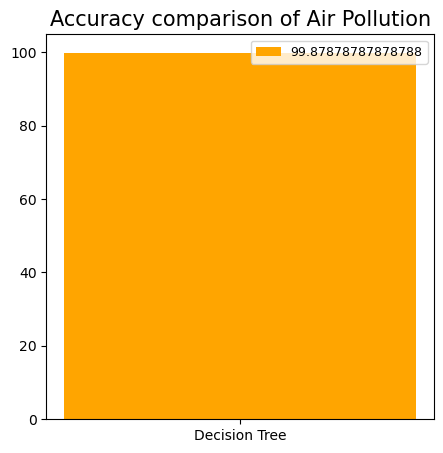

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictDT = dtree.predict(X_test)
print("")
print('Classification report of Decision Tree Classifier Results:')
print("")
print(classification_report(y_test,predictDT))
accuracy = cross_val_score(dtree, X, y, cv=70)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
print("")
print("Accuracy result of Decision Tree Classifier is:",accuracy.mean() * 100)
print("")
cm1=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")
accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree is:",accuracy.mean() * 100)
dtree=accuracy.mean() * 100
def graph():
    import matplotlib.pyplot as plt
    data=[dtree]
    alg="Decision Tree"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("orange"))
    plt.title("Accuracy comparison of Air Pollution",fontsize=15)
    plt.legend(b,data,fontsize=9)    
graph()

Confusion matrix-rfc:
[[ 73   0]
 [  0 175]]


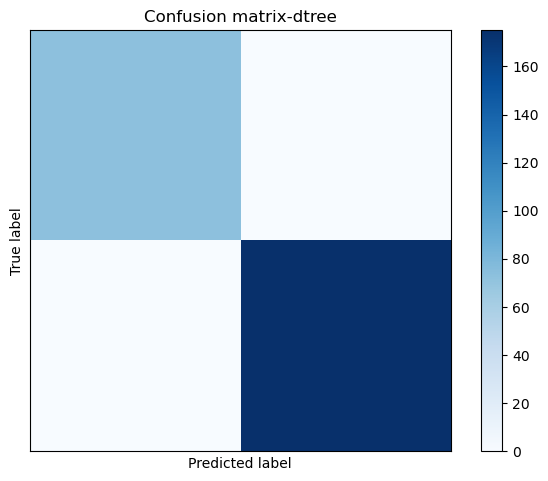

In [26]:
def plot_confusion_matrix(cm2, title='Confusion matrix-dtree', cmap=plt.cm.Blues):
    target_names=[]
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictDT)
print('Confusion matrix-rfc:')
print(cm2)
plot_confusion_matrix(cm2)


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.99      0.97      0.98       175

    accuracy                           0.98       248
   macro avg       0.96      0.98      0.97       248
weighted avg       0.98      0.98      0.98       248

Accuracy result of Naive Bayes is: 97.58064516129032

Confusion Matrix result of Naive Bayes is:
 [[ 72   1]
 [  5 170]]

Sensitivity :  0.9863013698630136

Specificity :  0.9714285714285714

Cross validation test results of accuracy:
[0.99393939 0.96969697 0.96363636 0.96969697 1.        ]

Accuracy result of Random Forest is: 97.93939393939392


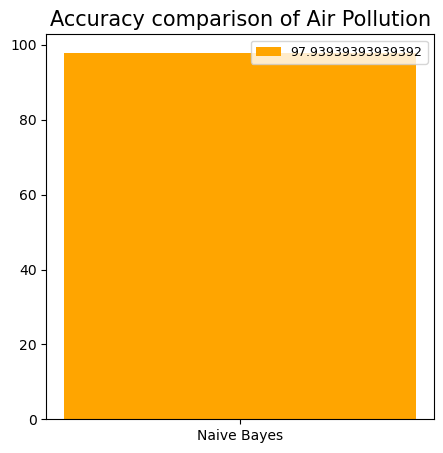

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictR = gnb.predict(X_test)
print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictR))
x = (accuracy_score(y_test,predictR)*100)
print('Accuracy result of Naive Bayes is:', x)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")
accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
gnb=accuracy.mean() * 100
def graph():
    import matplotlib.pyplot as plt
    data=[gnb]
    alg="Naive Bayes"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("orange"))
    plt.title("Accuracy comparison of Air Pollution",fontsize=15)
    plt.legend(b,data,fontsize=9)    
graph()

Confusion matrix-rfc:
[[ 72   1]
 [  5 170]]


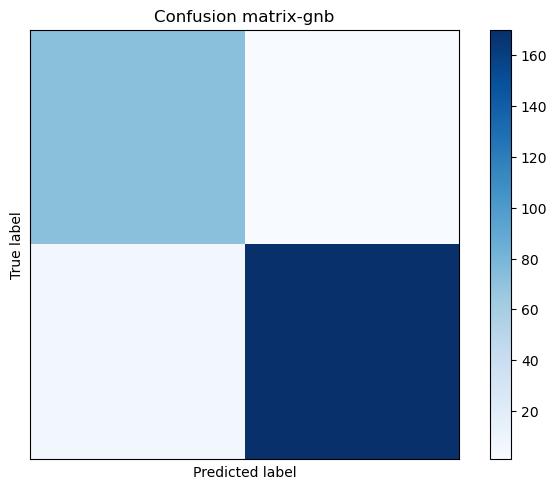

In [28]:
def plot_confusion_matrix(cm2, title='Confusion matrix-gnb', cmap=plt.cm.Blues):
    target_names=[]
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-rfc:')
print(cm1)
plot_confusion_matrix(cm1)

In [29]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 170
True Negative : 5
False Positive : 1
False Negative : 72

True Positive Rate : 0.7024793388429752
True Negative Rate : 0.8333333333333334
False Positive Rate : 0.16666666666666666
False Negative Rate : 0.2975206611570248

Positive Predictive Value : 0.9941520467836257
Negative predictive value : 0.06493506493506493
